In [123]:
import pandas as pd
import numpy as np

from scipy.stats import boxcox
from scipy.stats import yeojohnson
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [124]:
df = pd.read_csv(r'C:\Users\sharm\OneDrive\Desktop\Mechentex\car dataset.csv') #Load CSV File to notebook

In [125]:
df #Show loaded dataframe

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [126]:
df.isnull().sum() #Checking count of null values in respective columns


name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [127]:
df = df.dropna(axis=0)  # Drop all rows containing null values
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [128]:
# Resetting the index
df = df.reset_index(drop=True)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
832,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
833,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
834,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
835,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [129]:
# Identify duplicate rows
duplicate_rows = df.duplicated

# Filter and display duplicate rows
duplicate_df = df[duplicate_rows]
duplicate_df['Duplicates Count'] = duplicate_df.groupby(list(df.columns)).transform('size')
# Display the result
print(duplicate_df)


                                     name   company  year     Price  \
14   Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007    80,000   
15                Mahindra Jeep CL550 MDI  Mahindra  2006  4,25,000   
20                   Mahindra Scorpio S10  Mahindra  2016  3,50,000   
24                 Hyundai i20 Sportz 1.2   Hyundai  2012  1,00,000   
25                 Hyundai i20 Sportz 1.2   Hyundai  2012  1,00,000   
..                                    ...       ...   ...       ...   
602               Tata Sumo Gold EX BS IV      Tata  2012  2,10,000   
616         Maruti Suzuki Swift VDi BS IV    Maruti  2012  2,80,000   
698                   Mahindra Scorpio S4  Mahindra  2015  8,65,000   
810            Hyundai Getz Prime 1.3 GLX   Hyundai  2009  1,15,000   
829    Maruti Suzuki Swift Dzire Tour VDi    Maruti  2009  2,50,000   

     kms_driven fuel_type  Duplicates Count  
14   45,000 kms    Petrol                 1  
15       40 kms    Diesel                 1  
20   43,0

C:\Users\sharm\AppData\Local\Temp\ipykernel_2012\888122399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df['Duplicates Count'] = duplicate_df.groupby(list(df.columns)).transform('size')


In [130]:
df = df.drop_duplicates()

# Display DataFrame after dropping duplicates
print("\nDataFrame after dropping duplicates:")
df


DataFrame after dropping duplicates:


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
832,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
833,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
834,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
835,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [131]:
# Check data types
column_data_types = df.dtypes

# Display the result
column_data_types

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [132]:
# Change data type of year column
df['year'] = df['year'].astype(int)

# Display the unique values in the year,price column
unique_year_values = df['year'].unique()
print(unique_year_values)
unique_price_values = df['Price'].unique()
print(unique_price_values)

#Removing vague values for proper datatype conversion
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].str.replace(',', '').astype(int)
column_data_types = df.dtypes
print(column_data_types)
print(df['Price'])

[2007 2006 2018 2014 2015 2012 2013 2016 2010 2017 2008 2011 2019 2009
 2005 2000 2003 2004 1995 2002 2001]
['80,000' '4,25,000' 'Ask For Price' '3,25,000' '5,75,000' '1,75,000'
 '1,90,000' '8,30,000' '2,50,000' '1,82,000' '3,15,000' '4,15,000'
 '3,20,000' '10,00,000' '5,00,000' '3,50,000' '1,60,000' '3,10,000'
 '75,000' '1,00,000' '2,90,000' '95,000' '1,80,000' '3,85,000' '1,05,000'
 '6,50,000' '6,89,999' '4,48,000' '5,49,000' '5,01,000' '4,89,999'
 '2,80,000' '3,49,999' '2,84,999' '3,45,000' '4,99,999' '2,35,000'
 '2,49,999' '14,75,000' '3,95,000' '2,20,000' '1,70,000' '85,000'
 '2,00,000' '5,70,000' '1,10,000' '4,48,999' '18,91,111' '1,59,500'
 '3,44,999' '4,49,999' '8,65,000' '6,99,000' '3,75,000' '2,24,999'
 '12,00,000' '1,95,000' '3,51,000' '2,40,000' '90,000' '1,55,000'
 '6,00,000' '1,89,500' '2,10,000' '3,90,000' '1,35,000' '16,00,000'
 '7,01,000' '2,65,000' '5,25,000' '3,72,000' '6,35,000' '5,50,000'
 '4,85,000' '3,29,500' '2,51,111' '5,69,999' '69,999' '2,99,999'
 '3,99,999' 

C:\Users\sharm\AppData\Local\Temp\ipykernel_2012\2141315580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
C:\Users\sharm\AppData\Local\Temp\ipykernel_2012\2141315580.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(',', '').astype(int)


In [133]:
unique_kms_driven = df['kms_driven'].unique()
print(unique_kms_driven)

df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.replace(' kms', '').astype(int)
print(df['kms_driven'])

['45,000 kms' '40 kms' '28,000 kms' '36,000 kms' '41,000 kms' '25,000 kms'
 '24,530 kms' '60,000 kms' '30,000 kms' '32,000 kms' '48,660 kms'
 '4,000 kms' '16,934 kms' '43,000 kms' '35,550 kms' '39,522 kms'
 '39,000 kms' '55,000 kms' '72,000 kms' '15,975 kms' '70,000 kms'
 '23,452 kms' '35,522 kms' '48,508 kms' '15,487 kms' '82,000 kms'
 '20,000 kms' '68,000 kms' '38,000 kms' '27,000 kms' '33,000 kms'
 '46,000 kms' '16,000 kms' '47,000 kms' '35,000 kms' '30,874 kms'
 '15,000 kms' '29,685 kms' '1,30,000 kms' '19,000 kms' '54,000 kms'
 '13,000 kms' '38,200 kms' '22,000 kms' '50,000 kms' '13,500 kms'
 '3,600 kms' '45,863 kms' '60,500 kms' '12,500 kms' '18,000 kms'
 '13,349 kms' '29,000 kms' '44,000 kms' '42,000 kms' '14,000 kms'
 '49,000 kms' '36,200 kms' '51,000 kms' '1,04,000 kms' '33,333 kms'
 '33,600 kms' '5,600 kms' '7,500 kms' '24,330 kms' '65,480 kms'
 '2,00,000 kms' '59,000 kms' '99,000 kms' '2,800 kms' '21,000 kms'
 '11,000 kms' '66,000 kms' '3,000 kms' '7,000 kms' '38,500 kms'
 '

C:\Users\sharm\AppData\Local\Temp\ipykernel_2012\2204117353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.replace(' kms', '').astype(int)


In [134]:
column_data_types = df.dtypes
column_data_types #Final  datatype of columns after correction

name          object
company       object
year           int32
Price          int32
kms_driven     int32
fuel_type     object
dtype: object

In [135]:
df


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
832,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
833,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
834,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
835,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [136]:
#Checking for vague values in other columns too

unique_fuel_type = df['fuel_type'].unique()
print(unique_fuel_type)
unique_company = df['company'].unique()
print(unique_company)
unique_name = df['name'].unique()
print(unique_name)


['Petrol' 'Diesel' 'LPG']
['Hyundai' 'Mahindra' 'Ford' 'Maruti' 'Skoda' 'Audi' 'Toyota' 'Renault'
 'Honda' 'Datsun' 'Mitsubishi' 'Tata' 'Volkswagen' 'Chevrolet' 'Mini'
 'BMW' 'Nissan' 'Hindustan' 'Fiat' 'Force' 'Mercedes' 'Land' 'Jaguar'
 'Jeep' 'Volvo']
['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai i20 Sportz 1.2'
 'Maruti Suzuki Alto 800 Lx' 'Maruti Suzuki Vitara Brezza ZDi'
 'Maruti Suzuki Alto LX' 'Mahindra Bolero DI'
 'Maruti Suzuki Swift Dzire ZDi' 'Mahindra Scorpio S10 4WD'
 'Maruti Suzuki Swift Vdi BSIII' 'Maruti Suzuki Wagon R VXi BS III'
 'Maruti Suzuki Wagon R V

In [137]:
df.info() #Finally all data is Cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 836
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        724 non-null    object
 1   company     724 non-null    object
 2   year        724 non-null    int32 
 3   Price       724 non-null    int32 
 4   kms_driven  724 non-null    int32 
 5   fuel_type   724 non-null    object
dtypes: int32(3), object(3)
memory usage: 31.1+ KB


In [138]:
############################################  EDA AND OULIER HANDLING ####################
df.describe()


,year,Price,kms_driven
count,724.000000,7.240000e+02,724.000000
mean,2012.321823,4.032451e+05,46791.342541
std,4.122940,4.802936e+05,34575.416435
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,8.500003e+06,400000.000000


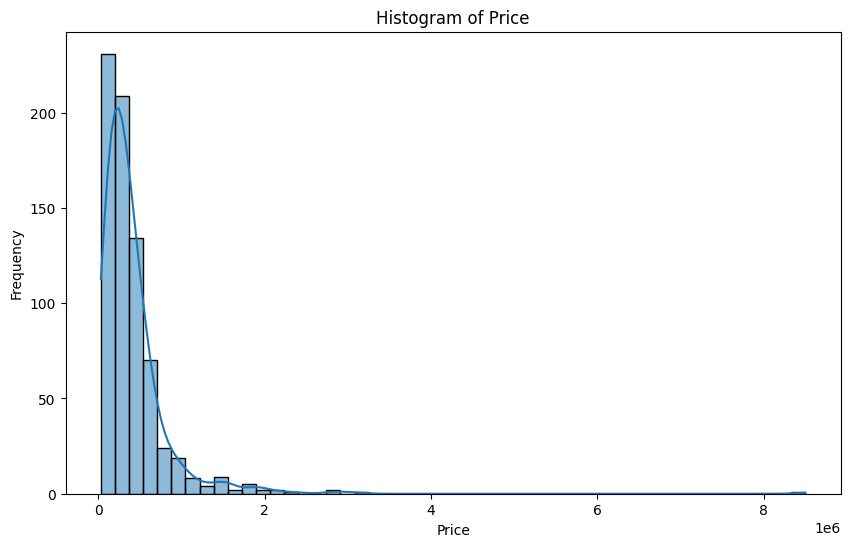

C:\Users\sharm\AppData\Local\Temp\ipykernel_2012\3756902682.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], color='skyblue')


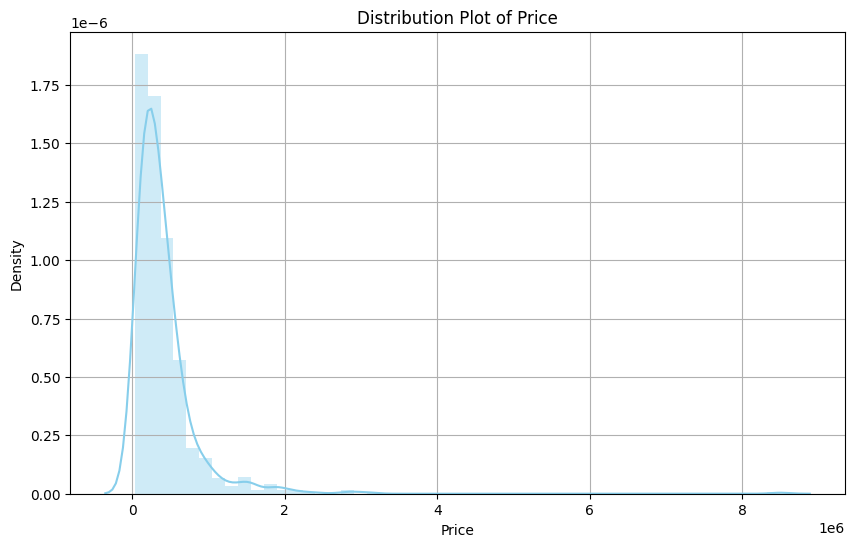

<Figure size 640x480 with 0 Axes>

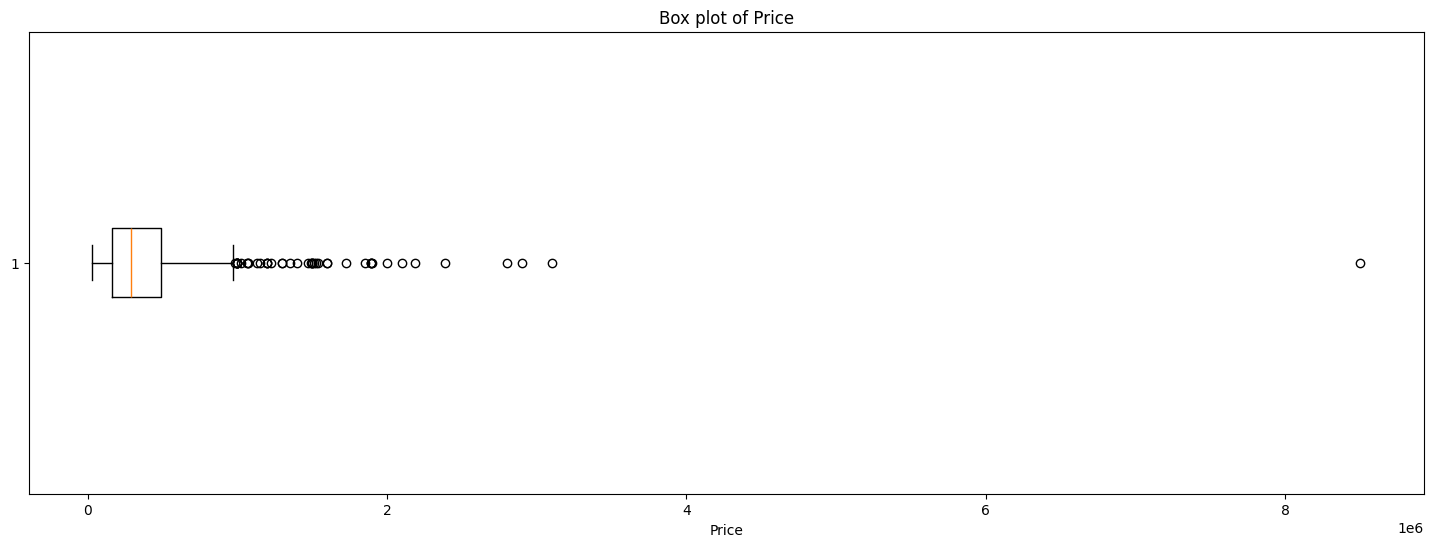

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

#Checking whether Price is normally distributed or not.

#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Dist plot
plt.figure(figsize=(10, 6))
sns.distplot(df['Price'], color='skyblue')
plt.title('Distribution Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()
plt.tight_layout()
import pandas as pd
import matplotlib.pyplot as plt

# See outliers
#Box Plot
plt.figure(figsize=(18,6))
plt.boxplot(df['Price'], vert=False)
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

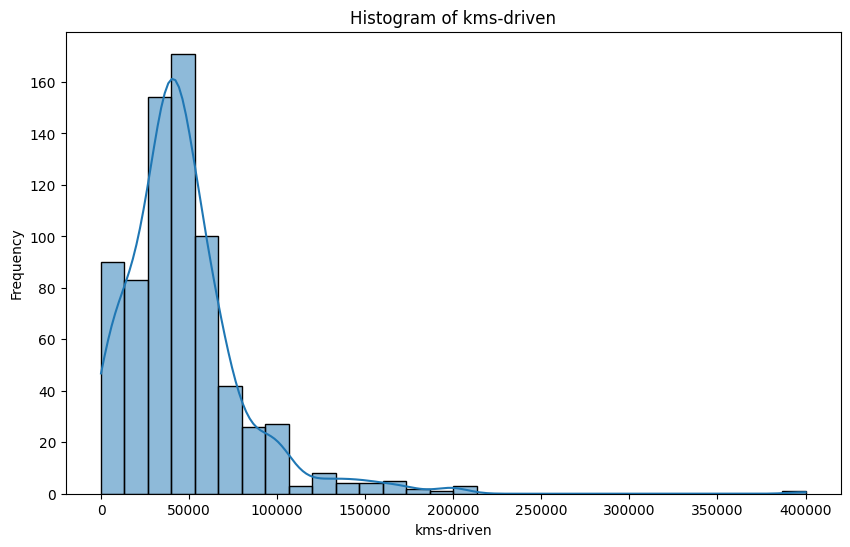

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for kms_driven
plt.figure(figsize=(10, 6))
sns.histplot(df['kms_driven'], bins=30, kde=True)
plt.title('Histogram of kms-driven')
plt.xlabel('kms-driven')
plt.ylabel('Frequency')
plt.show()

In [141]:
# Filtering cars with price > 10 lakhs
cars_over_10_lakhs = df[df['Price'] > 1000000]  

# Display filtered data
print(len(cars_over_10_lakhs))
print(cars_over_10_lakhs)

38
                                             name     company  year    Price  \
49        Mitsubishi Pajero Sport Limited Edition  Mitsubishi  2015  1475000   
72                              Mini Cooper S 1.6        Mini  2013  1891111   
78                              Mini Cooper S 1.6        Mini  2013  1891111   
84   Volkswagen Vento Highline Plus 1.5 Diesel AT  Volkswagen  2019  1200000   
98                       BMW 7 Series 740Li Sedan         BMW  2009  1600000   
225         Mercedes Benz GLA Class 200 CDI Sport    Mercedes  2015  2000000   
226                    Land Rover Freelander 2 SE        Land  2015  2100000   
229             Mercedes Benz B Class B180 Sports    Mercedes  2014  1400000   
243                                 Mini Cooper S        Mini  2013  1891111   
330                Audi A4 2.0 TDI 177bhp Premium        Audi  2012  1350000   
349                               Toyota Fortuner      Toyota  2011  1074999   
357                               Mah

In [142]:
df = df.reset_index(drop=True)
df


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
719,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
720,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
721,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
722,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


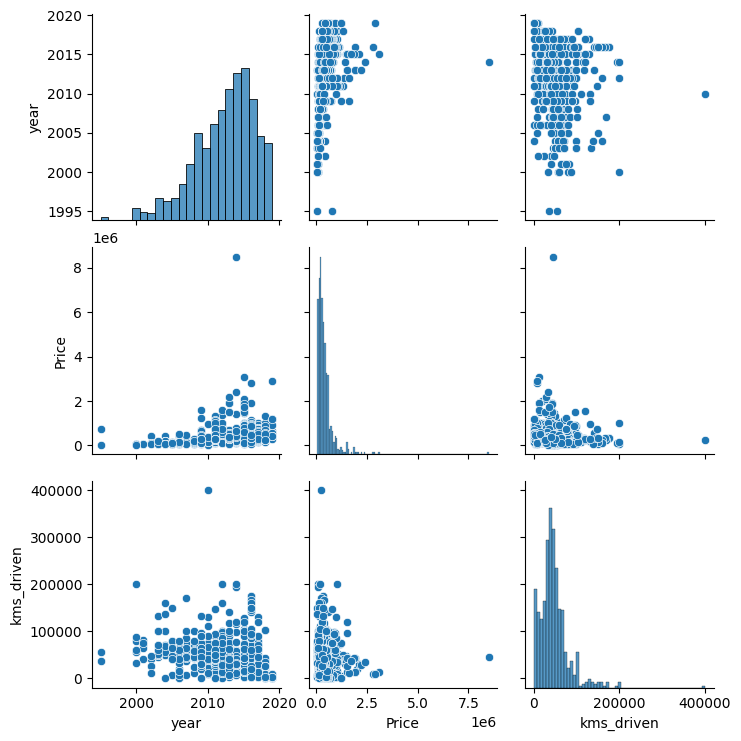

In [143]:
sns.pairplot(df)
plt.show()

In [144]:
cars_over_50_lakhs = df[df['Price'] > 3100000] #Only one car with price greater than 31,00000 .OUTLIER DETECTED!!!
print(cars_over_50_lakhs)

                   name   company  year    Price  kms_driven fuel_type
447  Mahindra XUV500 W6  Mahindra  2014  8500003       45000    Diesel


In [145]:
df = df.drop(447) #Removed outlier

In [146]:
# Index of the row with the highest value in the "kms_driven".
max_kms_index = df['kms_driven'].idxmax()

# Retrieving the row with highest kms_driven
car_with_highest_kms = df.loc[max_kms_index]

print("Car with highest kms_driven:")
print(car_with_highest_kms)

Car with highest kms_driven:
name          Honda City 1.5 V MT Exclusive
company                               Honda
year                                   2010
Price                                240000
kms_driven                           400000
fuel_type                            Petrol
Name: 280, dtype: object


In [147]:
df.describe()

,year,Price,kms_driven
count,723.000000,7.230000e+02,723.000000
mean,2012.319502,3.920462e+05,46793.820194
std,4.125321,3.742673e+05,34599.288028
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,3.100000e+06,400000.000000


In [148]:
# Sort the DataFrame based on the "kms_driven" column in descending order
sorted_df = df.sort_values(by='kms_driven',ascending = False)

# Print the sorted DataFrame
print("Sorted DataFrame by kms_driven (descending):")
print(sorted_df)

Sorted DataFrame by kms_driven (descending):
                                       name    company  year    Price  \
280           Honda City 1.5 V MT Exclusive      Honda  2010   240000   
111             Hindustan Motors Ambassador  Hindustan  2000    70000   
493               Tata Manza Aqua Quadrajet       Tata  2014   160000   
560                Maruti Suzuki Ertiga Vxi     Maruti  2012  1000000   
473           Tata Indigo eCS LX TDI BS III       Tata  2014    95000   
..                                      ...        ...   ...      ...   
591  Maruti Suzuki Zen Estilo LXI Green CNG     Maruti  2009   125000   
627                  Tata Tiago Revotorq XZ       Tata  2019   568500   
604                    Hyundai Creta 1.6 SX    Hyundai  2019  1200000   
572               Ford Figo Petrol Titanium       Ford  2019   525000   
295      Toyota Innova 2.5 E MS 7 STR BS IV     Toyota  2012   770000   

     kms_driven fuel_type  
280      400000    Petrol  
111      200000    Die

In [149]:
df = df.drop(280) #Outlier in kms_driven removed


In [150]:
df['name'] = df['name'].str.split().str[:3].str.join(' ') # Name column had mix of Numerical + string values so kept only first three words.
#More importantly doing this improved R2 SCORE

In [151]:


df = df.reset_index(drop=True)
df #Final Dataframe after Oulier Handling


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
717,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
718,Tata Indica V2,Tata,2009,110000,30000,Diesel
719,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
720,Tata Zest XM,Tata,2018,260000,27000,Diesel


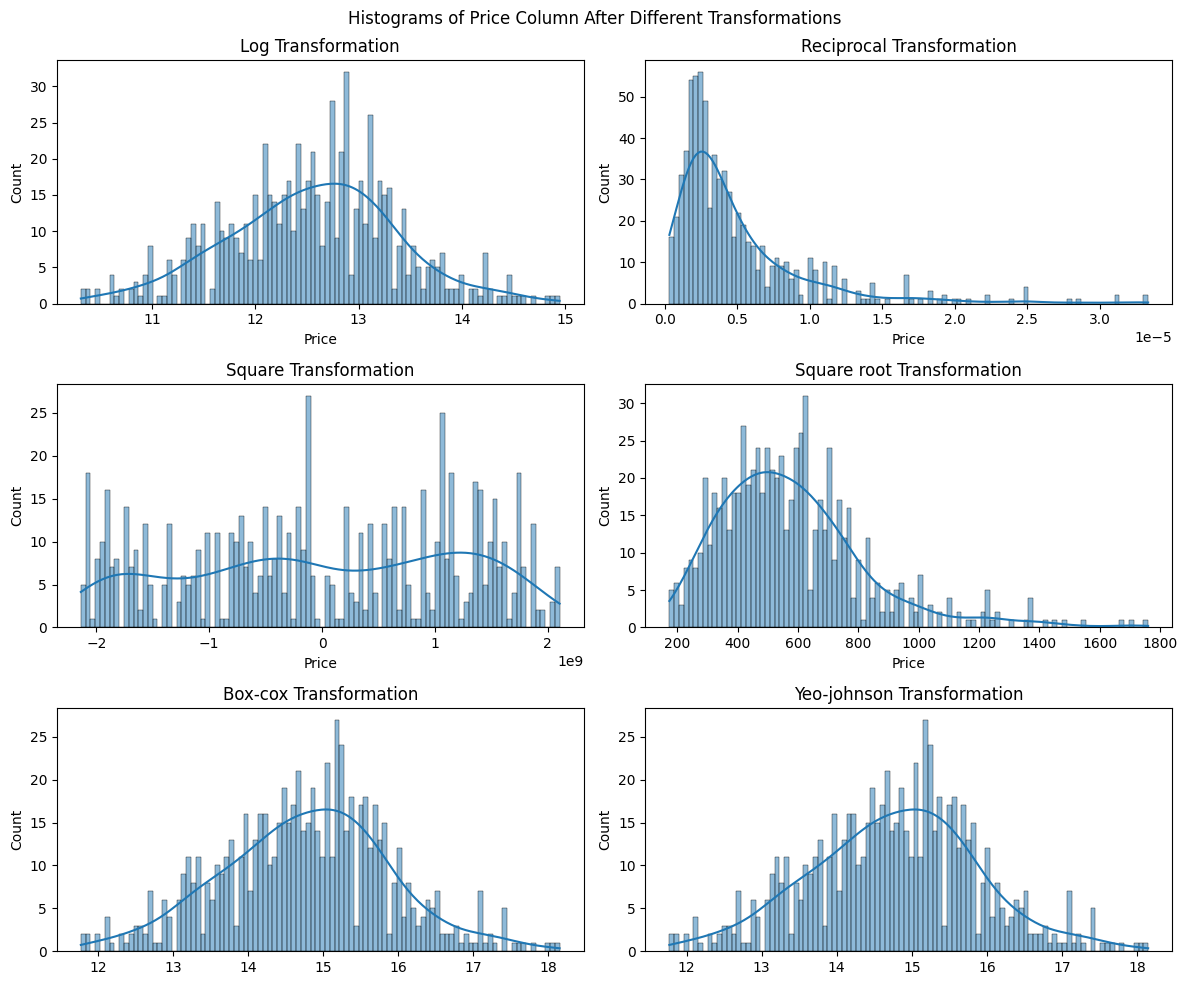

In [152]:
#Tried plotting varoius transformation to see which gives good result

# Transformation functions
transformations = {
    'log': lambda x: np.log(x+0.00001),
    'reciprocal': lambda x: 1 / (x+0.00001),
    'square': lambda x: np.square(x),
    'square root': lambda x: np.sqrt(x),
    'box-cox': lambda x: boxcox(x + 0.0001)[0],  # Adding 1 to handle zero values
    'yeo-johnson': lambda x: yeojohnson(x + 0.00001)[0]  # Adding 1 to handle zero values
}

# Plotting histograms for each transformation
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Histograms of Price Column After Different Transformations')

for i, (transformation, func) in enumerate(transformations.items()):
    ax = axs[i // 2, i % 2]
    transformed_price = func(df['Price'])
    sns.histplot(transformed_price, ax=ax, bins=100, kde=True)
    ax.set_title(transformation.capitalize() + ' Transformation')

plt.tight_layout()
plt.show()

In [153]:
import pandas as pd
import numpy as np

 
# Applying one-hot encoding to categorical columns and StandardScaler to numerical_columns
categorical_cols = ['name', 'company', 'fuel_type']
numerical_cols = ['year','kms_driven']
transformers = [
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
]
column_transformer = ColumnTransformer(transformers, remainder='passthrough')
X = column_transformer.fit_transform(df.drop(columns=['Price']))
y = np.log(df['Price'] + 0.00001)

# Initialize variables to keep track of the best random state and its corresponding R-squared score
#best_random_state = None
#max_r2_score = float('-inf')

# Loop through different random states
#for random_state in range(10000):  # You can adjust the range as needed
    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1303)

# Applying Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate R-squared score
r2_test = r2_score(y_test, y_pred_test)

# Check if the current R-squared score is the highest
#if r2_test > max_r2_score:
#max_r2_score = r2_test
#best_random_state = random_state

#print("Best Random State:", best_random_state)
print(" R-squared score:",r2_test)


 R-squared score: 0.8809116279632739


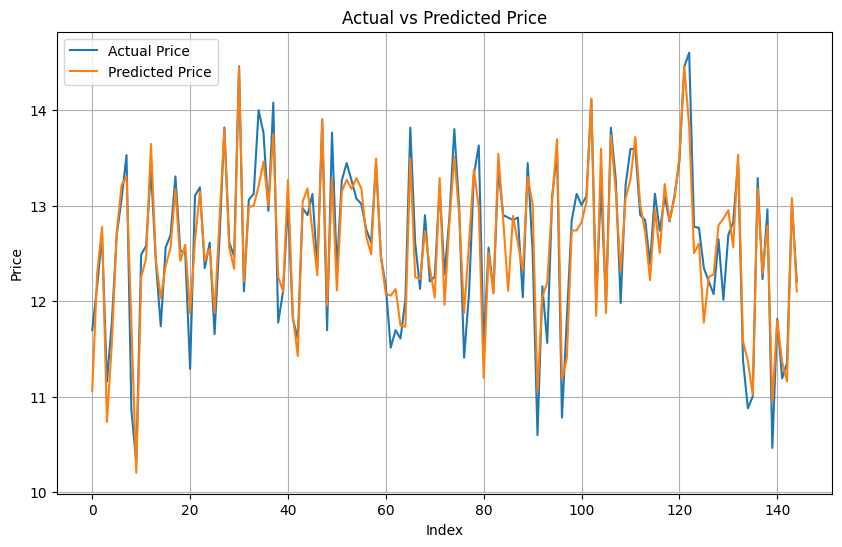

In [154]:
# Plot of  actual and predicted Price
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Price')
plt.plot(np.arange(len(y_test)), y_pred_test, label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
######################################################THANK YOU################################